# 第3章 （3）実際にデータを最小二乗法で予測する

# まずはデータを生成する．
## データはある数理モデルからノイズ（正規乱数）を受けて発生すると考える．

### データ発生メカニズム


$$
 f(x)=x^4 - 8x^3 + 18x^2 - 3x +1
$$

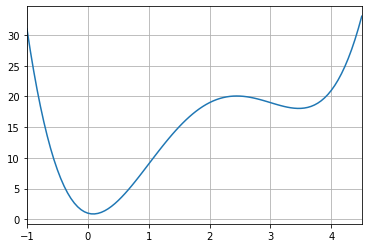

In [32]:
import numpy as np

# 数理モデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 目的関数のグラフを表示する
import matplotlib.pyplot as plt

# データ生成
# x
xmin = -1.0
xmax = 4.5
num = 100 
x = np.linspace(xmin, xmax, num)

# y
y = mathfunc(x)

# グラフ表示
plt.plot(x, y)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# これまでのデータにはノイズがないので，ノイズを加えて表示する．

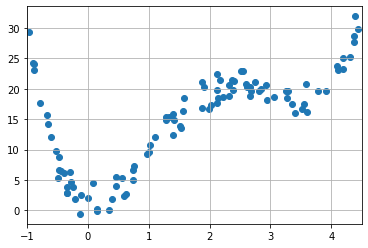

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 目的関数
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成
x = (xmax - xmin) * np.random.rand(num) + xmin

# ｘからｙを生成する．
y = mathfunc(x)

# yにノイズ（正規乱数（平均0．0， 標準偏差1.5））を加える．
y += np.random.normal(loc=0.0, scale=1.5, size=num)

# グラフ表示
plt.scatter(x, y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# このデータを扱いやすいようにPandasに変換する

In [34]:
ｘ

array([ 2.01847427,  2.93354152,  2.31519857,  1.99685751,  1.3301014 ,
        2.55241762,  1.40672966,  3.9047515 ,  4.30014518,  1.10892835,
        3.35448771,  1.90892206,  2.12424509,  4.09078151, -0.60930168,
       -0.52078885, -0.88879881,  3.57940915,  3.27986213,  3.78506682,
        4.38240088,  3.3953721 ,  1.53813649,  3.29291047, -0.34949066,
        2.51956562, -0.21155692,  4.19567904,  1.87016577,  1.28064067,
        0.45505587,  3.25828529,  1.50882683,  2.12638672, -0.8966561 ,
        2.39699523,  2.36652647,  2.39313698,  4.19061443,  2.75001165,
        0.97729345,  1.40367575,  2.83697158, -0.66875991,  2.66721693,
        2.68850828,  0.15710409, -0.29090536,  0.73485593,  1.00040924,
        2.13608224,  1.41230832,  4.43605611, -0.43875354,  0.14882216,
       -0.11279765,  2.59209579,  0.39310381,  1.56470925,  0.34434076,
       -0.12566729, -0.39293672,  2.60981274, -0.23999377,  0.08120299,
        1.02798844,  3.51546276, -0.46594298,  3.60869699, -0.47

In [35]:
y

array([ 1.73425989e+01,  2.05494606e+01,  2.06882561e+01,  1.66798628e+01,
        1.53916897e+01,  2.28680563e+01,  1.58138822e+01,  1.96483526e+01,
        2.51417562e+01,  1.19927171e+01,  1.75257442e+01,  2.03285756e+01,
        1.98412551e+01,  2.37995144e+01,  1.19923726e+01,  9.70775676e+00,
        2.41424763e+01,  2.08313481e+01,  1.84445946e+01,  1.95630868e+01,
        3.18968179e+01,  1.60638976e+01,  1.35505521e+01,  1.96832475e+01,
        2.84379762e+00,  2.29664414e+01,  1.89760745e+00,  2.31732775e+01,
        2.11343845e+01,  1.47868918e+01,  5.45256778e+00,  1.96575837e+01,
        1.38629912e+01,  2.24014446e+01,  2.41734612e+01,  2.12678689e+01,
        2.14655081e+01,  1.98297174e+01,  2.51098424e+01,  2.10746893e+01,
        9.26950028e+00,  1.23621151e+01,  1.99198169e+01,  1.56389671e+01,
        1.88213461e+01,  1.95985451e+01,  2.89816330e-01,  6.37398507e+00,
        6.64107148e+00,  9.61651288e+00,  1.84147698e+01,  1.49174148e+01,
        2.97793051e+01,  

In [36]:
array = np.array([x,y])

In [37]:
array[0,0] # xの0番目のデータ

2.018474271600286

In [38]:
array[1,0] # yの0番目のデータ

17.342598921044257

In [39]:
# Pandasのデータフレーム形式に変換する

import pandas as pd

df = pd.DataFrame(array.T, columns=['x','y'])

In [40]:
df

,x,y
0,2.018474,17.342599
1,2.933542,20.549461
2,2.315199,20.688256
3,1.996858,16.679863
4,1.330101,15.391690
...,...,...
95,0.007552,2.000758
96,2.225821,18.620621
97,-0.889408,23.127026
98,3.559170,17.436300


In [41]:
df.x[0] # xの0番目のデータ

2.018474271600286

In [42]:
df.y[0] # yの0番目のデータ

17.342598921044257

In [43]:
# データをｘの小さい順にソートする
df = df.sort_values('x')

In [44]:
df

,x,y
99,-0.974175,29.327742
34,-0.896656,24.173461
97,-0.889408,23.127026
16,-0.888799,24.142476
75,-0.784467,17.675902
...,...,...
8,4.300145,25.141756
70,4.370527,28.611522
72,4.372186,27.646326
20,4.382401,31.896818


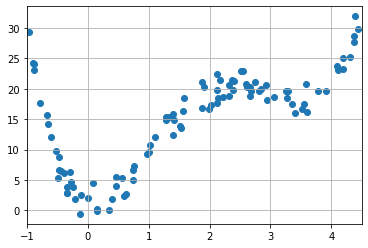

In [45]:
# グラフ表示
plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# これでデータ生成が完了

# ここから最小二乗法のパラメータを求める．（素朴な方法）
# 次数=2

In [46]:
# 連立1次方程式 Ax = bの行列Aを求める
# 次数2のとき
matrixA = np.zeros((2,2))
b = np.zeros((2,1))

In [47]:
matrixA[0,0] = sum(df.x * df.x)
matrixA[0,1] = sum(df.x)
matrixA[1,0] = sum(df.x)
matrixA[1,1] = len(df.x)

b[0,0] = sum(df.x*df.y)
b[1,0] = sum(df.y)

In [48]:
matrixA

array([[507.5485627 , 160.03661173],
       [160.03661173, 100.        ]])

In [49]:
b

array([[3246.34253425],
       [1488.22870998]])

In [50]:
# 行列Aの逆行列を求めて，ベクトルbに左から掛ける
ans = np.dot(np.linalg.inv(matrixA),b)
ans

array([[3.43883763],
       [9.37888787]])

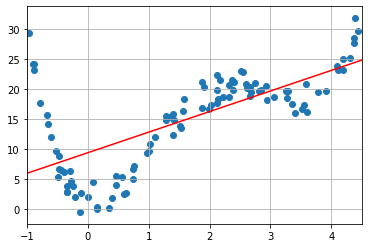

In [51]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0] * x + ans[1]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red') # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# ここから最小二乗法のパラメータを求める．（素朴な方法）
# 次数=4

In [52]:
# 連立1次方程式 Ax = bの行列Aを求める
# 次数2のとき
matrixA = np.zeros((3,3))
b = np.zeros((3,1))

matrixA[0,0] = sum(df.x * df.x *df.x*df.x)
matrixA[0,1] = sum(df.x * df.x *df.x)
matrixA[0,2] = sum(df.x * df.x)
matrixA[1,0] = sum(df.x * df.x *df.x)
matrixA[1,1] = sum(df.x * df.x)
matrixA[1,2] = sum(df.x)
matrixA[2,0] = sum(df.x * df.x)
matrixA[2,1] = sum(df.x)
matrixA[2,2] = len(df.x)

b[0,0] = sum(df.x*df.x*df.y)
b[1,0] = sum(df.x*df.y)
b[2,0] = sum(df.y)

ans = np.dot(np.linalg.inv(matrixA),b)
ans

array([[0.72803602],
       [1.02925265],
       [9.53996969]])

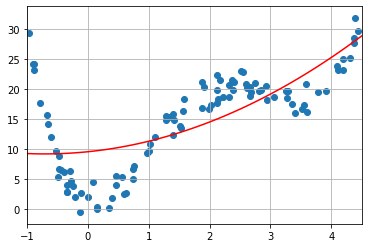

In [54]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x + ans[1]*x + ans[2]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red') # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# 機械学習ライブラリを使って，求める

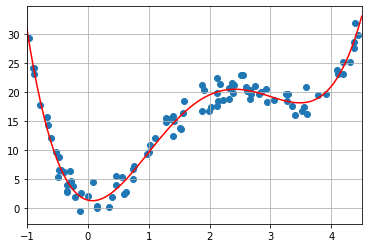

In [56]:
# numpyのライブラリを使ってパラメータを求める
ans = np.polyfit(df.x, df.y, 4)

# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x*x*x + ans[1]*x*x*x + ans[2]*x*x + ans[3]*x + ans[4]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y,color='red') # 求めたパラメータから直線を引く

plt.scatter(df.x, df.y) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

In [57]:
# 最小二乗法（次数4）
np.polyfit(df.x, df.y, 4)

array([ 1.00698752, -8.02485901, 17.86535698, -2.59884428,  1.32927119])

In [58]:
# 求めたパラメータを持つ多項式を作成
np.poly1d(np.polyfit(df.x, df.y, 4))

poly1d([ 1.00698752, -8.02485901, 17.86535698, -2.59884428,  1.32927119])

In [59]:
# 求めた多項式f(x)にｘを与えて，yを計算する．
np.poly1d(np.polyfit(df.x, df.y, 4))(df.x)

array([29.14149618, 24.45922454, 24.0491841 , 24.01490215, 18.6174858 ,
       13.65899772, 12.84619774, 11.49926958,  8.73575806,  7.71982444,
        7.41620947,  7.27804273,  6.62380144,  5.61971763,  4.77727337,
        4.73206926,  4.58788762,  3.80193005,  3.56927378,  3.09623634,
        2.75666309,  1.95417245,  1.86140117,  1.31065903,  1.231787  ,
        1.3122312 ,  1.33142569,  2.23920135,  2.60496397,  3.13312461,
        3.17482457,  4.11815621,  4.50772976,  4.92084088,  6.176156  ,
        6.34903519,  6.38885553,  9.28075253,  9.58326738,  9.94392985,
       10.99625719, 13.12824675, 13.15489024, 13.74732709, 14.59666657,
       14.63101975, 14.69357844, 15.73367806, 16.03268485, 16.29654722,
       16.42183474, 18.78142823, 18.83010112, 19.01918059, 19.49083259,
       19.59230428, 19.98030447, 20.00669524, 20.01368634, 20.04464716,
       20.13781959, 20.2782272 , 20.41834706, 20.42985652, 20.45887799,
       20.46888729, 20.46972939, 20.42025917, 20.38343552, 20.32

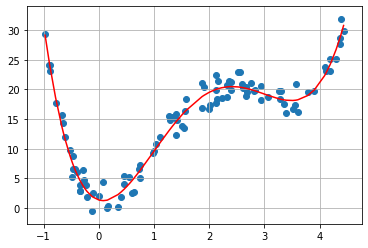

In [62]:
# それを一度に書くと以下のようになる．
plt.plot(df.x, np.poly1d(np.polyfit(df.x, df.y, 4))(df.x),color='red')

plt.scatter(df.x, df.y) # 散布図
plt.grid(True)